In [39]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import keras
#from skimage import data

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [3]:
zip_file_path = 'input.zip'
csv_file_name = 'input.csv'

with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_name) as csv_file:
        X_train = np.loadtxt(csv_file, delimiter=',')

In [4]:
zip_file_path = 'input_test.zip'
csv_file_name = 'input_test.csv'

with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_name) as csv_file:
        X_test = np.loadtxt(csv_file, delimiter=',')

In [5]:
zip_file_path = 'labels.zip'
csv_file_name = 'labels.csv'

with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_name) as csv_file:
        y_train = np.loadtxt(csv_file, delimiter=',')

In [6]:
zip_file_path = 'labels_test.zip'
csv_file_name = 'labels_test.csv'

with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_name) as csv_file:
        y_test = np.loadtxt(csv_file, delimiter=',')

In [7]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (2000, 30000)
Shape of y_train: (2000,)
Shape of X_test: (400, 30000)
Shape of y_test: (400,)


### Reshaping the Images. We have 2000 RGB (3 images) 100x100 images in X_train.

In [8]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [9]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of y_test: (400, 1)


In [10]:
X_test[1,:]

array([[[223., 211., 163.],
        [223., 209., 160.],
        [244., 228., 179.],
        ...,
        [252., 253., 255.],
        [254., 255., 255.],
        [245., 246., 250.]],

       [[255., 246., 206.],
        [254., 241., 199.],
        [255., 251., 206.],
        ...,
        [252., 252., 250.],
        [255., 255., 253.],
        [255., 255., 253.]],

       [[255., 249., 222.],
        [254., 243., 213.],
        [255., 246., 212.],
        ...,
        [241., 239., 227.],
        [165., 163., 151.],
        [145., 143., 131.]],

       ...,

       [[136., 131., 128.],
        [174., 170., 167.],
        [181., 177., 176.],
        ...,
        [ 47.,  50.,  55.],
        [ 46.,  49.,  56.],
        [ 47.,  50.,  57.]],

       [[173., 165., 162.],
        [182., 177., 174.],
        [167., 162., 159.],
        ...,
        [ 70.,  74.,  77.],
        [ 70.,  73.,  78.],
        [ 70.,  73.,  78.]],

       [[141., 133., 130.],
        [133., 125., 122.],
        [121., 1

### Since the values are between 0-255, we normalize X_train and X_test.

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_test[1,:]

array([[[0.8745098 , 0.82745098, 0.63921569],
        [0.8745098 , 0.81960784, 0.62745098],
        [0.95686275, 0.89411765, 0.70196078],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.96078431, 0.96470588, 0.98039216]],

       [[1.        , 0.96470588, 0.80784314],
        [0.99607843, 0.94509804, 0.78039216],
        [1.        , 0.98431373, 0.80784314],
        ...,
        [0.98823529, 0.98823529, 0.98039216],
        [1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.99215686]],

       [[1.        , 0.97647059, 0.87058824],
        [0.99607843, 0.95294118, 0.83529412],
        [1.        , 0.96470588, 0.83137255],
        ...,
        [0.94509804, 0.9372549 , 0.89019608],
        [0.64705882, 0.63921569, 0.59215686],
        [0.56862745, 0.56078431, 0.51372549]],

       ...,

       [[0.53333333, 0.51372549, 0.50196078],
        [0.68235294, 0.66666667, 0.65490196],
        [0.70980392, 0

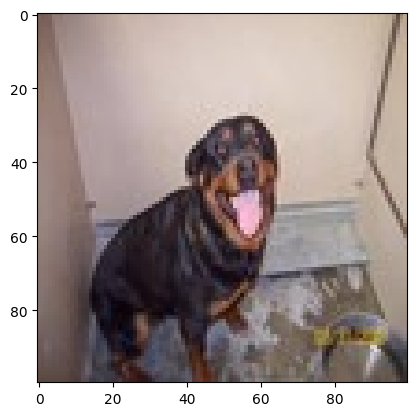

In [13]:
idx = np.random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

## Model

In [14]:
"""
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
"""

"\nmodel = Sequential([\n    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),\n    MaxPooling2D((2,2)),\n\n    Conv2D(32, (3,3), activation='relu'),\n    MaxPooling2D((2,2)),\n\n    Flatten(),\n    Dense(64, activation='relu'),\n    Dense(1, activation='sigmoid')\n])\n"

In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
# Stochastic Gradient Descent 
#opt = keras.optimizers.SGD(learning_rate=0.001)
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
# Adaptive Movement Estimation (ADAM Gradient Descent)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5


32/32 [==============================] - 12s 277ms/step - loss: 0.7148 - accuracy: 0.5250
Epoch 2/5
32/32 [==============================] - 7s 219ms/step - loss: 0.6765 - accuracy: 0.5860
Epoch 3/5
32/32 [==============================] - 7s 206ms/step - loss: 0.6323 - accuracy: 0.6485
Epoch 4/5
32/32 [==============================] - 7s 207ms/step - loss: 0.5791 - accuracy: 0.7055
Epoch 5/5
32/32 [==============================] - 7s 206ms/step - loss: 0.5021 - accuracy: 0.7660


In [19]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 1s 26ms/step - loss: 0.5914 - accuracy: 0.7075


[0.5913525223731995, 0.7074999809265137]

### Making Predictions

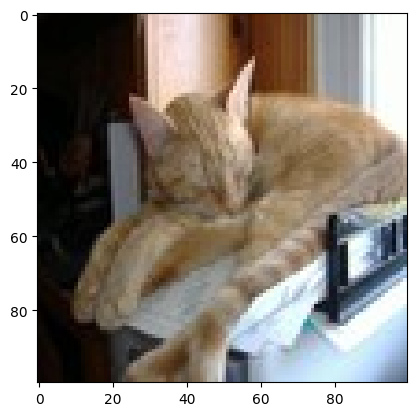

1/1 [==============================] - 0s 219ms/step
Our Model says it is a cat


In [20]:
idx2 = np.random.randint(0, len(X_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if y_pred == 0:
    pred = 'dog'
else: pred = 'cat'

print('Our Model says it is a',pred)

---

In [21]:
mnist = keras.datasets.mnist  # 28x28 images of hand-written digits 0-9

In [22]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [23]:
np.set_printoptions(linewidth=150, precision=2, suppress=True)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

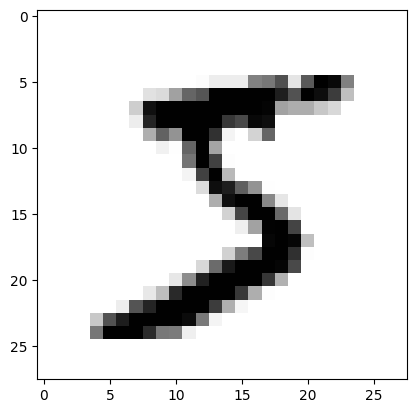

In [24]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [25]:
print('Shape of X_train is',X_train.shape)
print('Shape of X_test is',X_test.shape)
print('Shape of y_train is',y_train.shape)
print('Shape of y_test is',y_test.shape)

Shape of X_train is (60000, 28, 28)
Shape of X_test is (10000, 28, 28)
Shape of y_train is (60000,)
Shape of y_test is (10000,)


### Normalizing the values in X_train and X_test,

In [26]:
X_train = keras.utils.normalize(X_train, axis=1)
X_test = keras.utils.normalize(X_test, axis=1)

In [27]:
print(X_train[0])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.03 0.03 0.17 0.18 0.29 0.06 0.52 0.72 0.78 0.89 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.06 0.07 0.16 0.23 0.22 0.33 0.37 0.37 0.35 0.33 0.37 0.37 0.79 0.68 0.61 0.45 0.   0.   0.   0.  ]

In [28]:
model = Sequential()

In [29]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2595 - accuracy: 0.9248
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1053 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0717 - accuracy: 0.9772


In [32]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.9718
0.09011470526456833 0.9718000292778015


### We can save this model !!

In [33]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [34]:
new_model = keras.models.load_model('epic_num_reader.model')

In [35]:
predictions = new_model.predict([X_test])

313/313 [==============================] - 1s 2ms/step


In [36]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [37]:
print(np.argmax(predictions[0]))

7


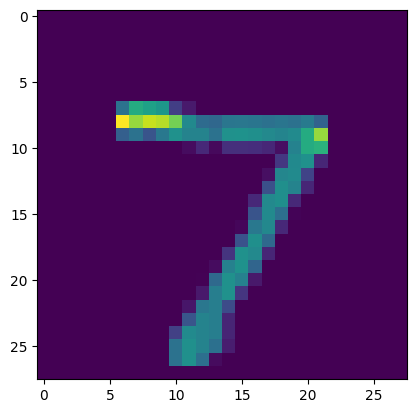

In [38]:
plt.imshow(X_test[0])
plt.show()